# Visualizing and Understanding
## Input Convolutional Layers
Suppose that each filter we use for a convolutional neural network has shape `(10, 10, 3)`, we can actually visualize it as an image of 10x10 pixels. If we have 64 of these filters for the first convolutional layer then we can visualize these 64 filters as 64 small images.

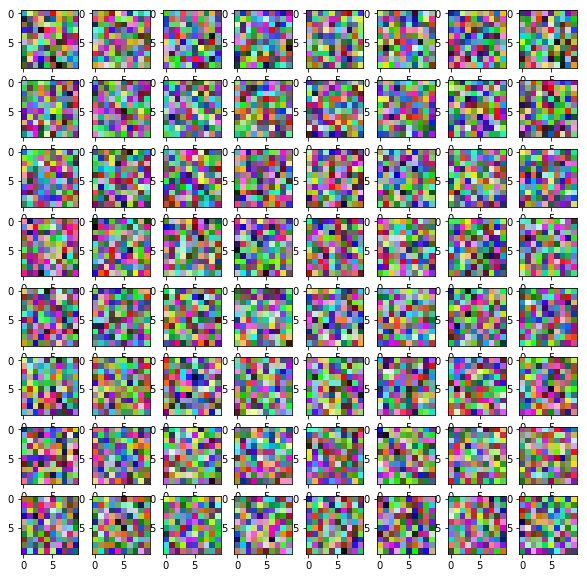

In [16]:
import numpy as np
from matplotlib import pyplot as plt

filters = np.random.rand(64, 10, 10, 3)

%matplotlib inline

fig=plt.figure(figsize=(10, 10))
for i in range(len(filters)):
    fig.add_subplot(8, 8, i + 1)
    plt.imshow(filters[i])

plt.show()

Why does visualizing the weights of a filter tell us what the filter is looking for? This is because maximal value of an inner product comes from when the filter matches up with input window of the image. For example, I have a vector `[1, 0, 0]` which is basically an unit vector pointing in the positive x direction. The inner product of this unit vector is maximized if it is being inner product with another vector that lies in the same direction and minimized if the other vector is exactly opposite.

## Final Convolutional Layers
### Nearest Neighbor
Visualizations of the hidden layers are typically not very interpretable and they don't necessarily have a depth of channels. For example, if I have a 32x32 input and I perform 64 7x7 filters convolution it. I will expect to receive an output of shape `(26, 26, 64)` which has 64 channels because there were 64 filters. Visualization would not carry any semantically interpretable meaning. 

However, the last layer we can use nearest neighbor classification to validate whether the feature space is correctly learned:

![L2_nearest_neighbor](img/L2_nearest_neighbor.png)

Remember from AlexNet that the last fully connected layer has a 4096-dim vector output before it is squashed into N-classes through another matrix multiplication. These 4096 dimensions capture the strength of each latent feature of an image. We can perform nearest neighbor distancing on our images and check if our model is working correctly.

### Dimensionality Reduction
Another approach we can take besides nearest neighbor is that we can perform PCA on the 4096-dim vector and flatten it into 2 dimensions. Then we can project the feature vector as a dot on a 2D plane (e.g. a plot). A more complex approach is using **t-SNE**. If we apply t-SNE technique to actual images, a natural clustering pattern will emerge, which is SO AMAZING that all insects are clustered at the bottom left hand corner. 

![cnn_embed_6k](https://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_6k.jpg)

The images are kind of small, go to the link to view the full size. 

## Intermediate Convolutional Layers
Although the weights of hidden layers are not very interpretable, we can still visualize the *activations* of these hidden layers. For example, in the 5th convolutional layer of the ALexNet architecture, the feature map is of shape `(13, 13, 128)` and we can interpret the map as 128 13x13 grayscale images.

### Maximally Activating Patches
Pick a layer and a channel, .e.g `conv5` is `(128, 13, 13)` and we pick the 17th of 128. Then run many images through the network and record values of chosen channel. We can then visualize image patches that correspond to maximal activations.

### Occlusion Experiments
First we mask part of the image before feeding to CNN and record the patch position as `(x, y)` coordinate:

![elephant_occlusion](img/elephant_occlusion.png)

We feed it to CNN and record the value for the classifcation probability. Then we move the patch around and repeat the same process. Then we can produce a heat map:

![elephant_occlusion_heatmap](img/elephant_occlusion_heatmap.png)

Then we can figure out which patch has the most influence on classification decision.

### Saliency Map
Compute the gradient of the class score with respect to the pixels of the input image and this will directly tell us, for each input pixel in the image, if we change that pixel a little bit, then how much will the classification score change. In other words, this tells us which pixels in the input matter for the classification decision.

![saliency_map](img/saliency_map.png)

## Gradient Ascent
What type of input would cause a neuron to activate? We can use gradient ascent to create such type of input. 

$$
I_{output} = argmax \; f(I_{input}) + R(I_{input})
$$

The function `f` represents the activation of a particular neuron or neurons. For example, we wish to maximize the activation of the neuron that projects feature space into classification score, say e.g. cat. We use backprop technique to modify and update the original input image to optimize the chance of such image being classified as cat.

1. Initialize an image to zeros
2. Repeat
    * a. Forwrd image to compute current scores
    * b. Backprop to get gradient of neuron value with respect to image pixels
    * c. Make a small update to the image
    
$$
argmax \; S_{class}(I_{input}) - \lambda \lVert I \rVert^{2}
$$

$S_{class}$ represents score for class before softmax function. The regularizer is essential for creating the correct representation. Details of regularizer will come later.
   
### Deep Dream
Rather than synthesizing an image to maximize a specific neuron, instead try to amplify the neuron activations at some layer in the network. Choose an image and a layer in a CNN, repeat the following:

* Forward propagate and compute activations at chosen layer
* Set gradient of chosen layer equal to its activation
* Backward propgate and compute gradient on image
* Update image

And then you can expect something like this, starting with just an image of the sky:
![deep_dream](img/deep_dream.png)

## Neural Style Transfer 

...